In [1]:
%pip install evidently

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade evidently

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install fairlearn

In [4]:
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [5]:
%pip install -U lightgbm


Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install --upgrade scikit-learn imbalanced-learn

  Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata (14 kB)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [12]:
df=pd.read_csv('PAKDD_Modelling_data.csv')
df.head()

C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\4242702065.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('PAKDD_Modelling_data.csv')


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


## Dropping columns

In [14]:
# dropping constant columns
df1=df.drop(columns=['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_MOBILE_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD'])
df1.shape

(50000, 45)

In [15]:
#dropping columns with >60% missing values
df2=df1.drop(columns=['MATE_EDUCATION_LEVEL', 'MATE_PROFESSION_CODE', 'PROFESSIONAL_BOROUGH', 'PROFESSIONAL_CITY','ID_CLIENT'])
df2.shape

(50000, 40)

In [16]:
#separating numerical and categorical columns based on datatype
numerical_df = df2.select_dtypes(include=['int64', 'float64'])
categorical_df = df2.select_dtypes(exclude=['int64', 'float64'])

In [17]:
numerical_df.shape

(50000, 25)

In [18]:
#dropping numerical columns with less tha 1% variation
numerical_df1 = numerical_df.drop(columns=[
    'FLAG_DINERS',
    'MONTHS_IN_THE_JOB',
    'FLAG_AMERICAN_EXPRESS',
    'FLAG_OTHER_CARDS',
    'POSTAL_ADDRESS_TYPE'
])


In [19]:
numerical_df1.shape

(50000, 20)

In [20]:
#dropping column based on high correlation
numerical_df2=numerical_df1.drop(columns=['QUANT_BANKING_ACCOUNTS'])
numerical_df2.shape

(50000, 19)

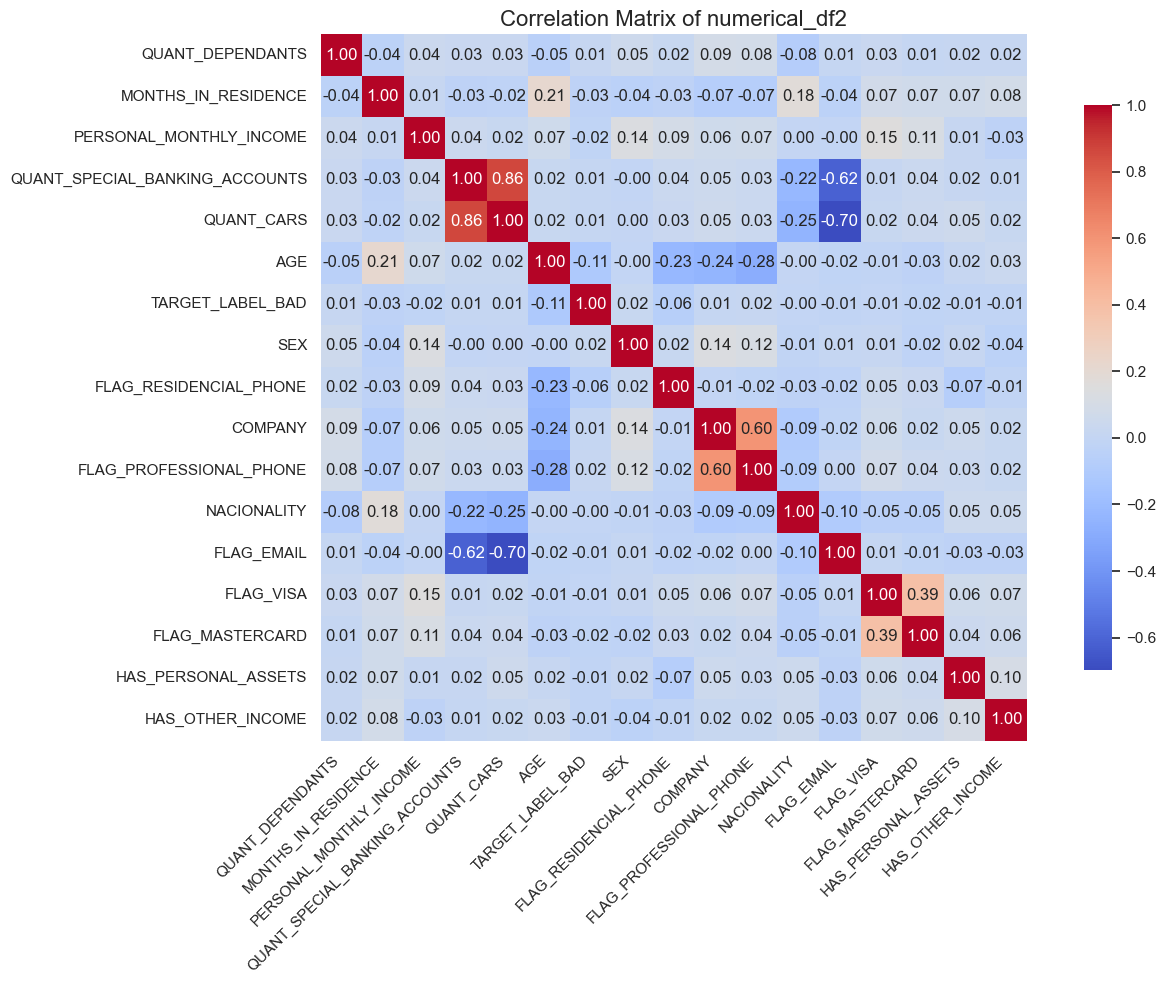

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = numerical_df2.corr()

# Set the figure size and style
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

plt.title("Correlation Matrix of numerical_df2", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# dropping columns based on high association
'''categorical_df1=categorical_df.drop(columns=['PROFESSIONAL_PHONE_AREA_CODE','RESIDENCIAL_ZIP_3','RESIDENCIAL_PHONE_AREA_CODE'])'''

"categorical_df1=categorical_df.drop(columns=['PROFESSIONAL_PHONE_AREA_CODE','RESIDENCIAL_ZIP_3','RESIDENCIAL_PHONE_AREA_CODE'])"

In [23]:
categorical_df1=categorical_df.drop(columns=['PROFESSIONAL_PHONE_AREA_CODE'])

In [24]:
categorical_df1.shape

(50000, 14)

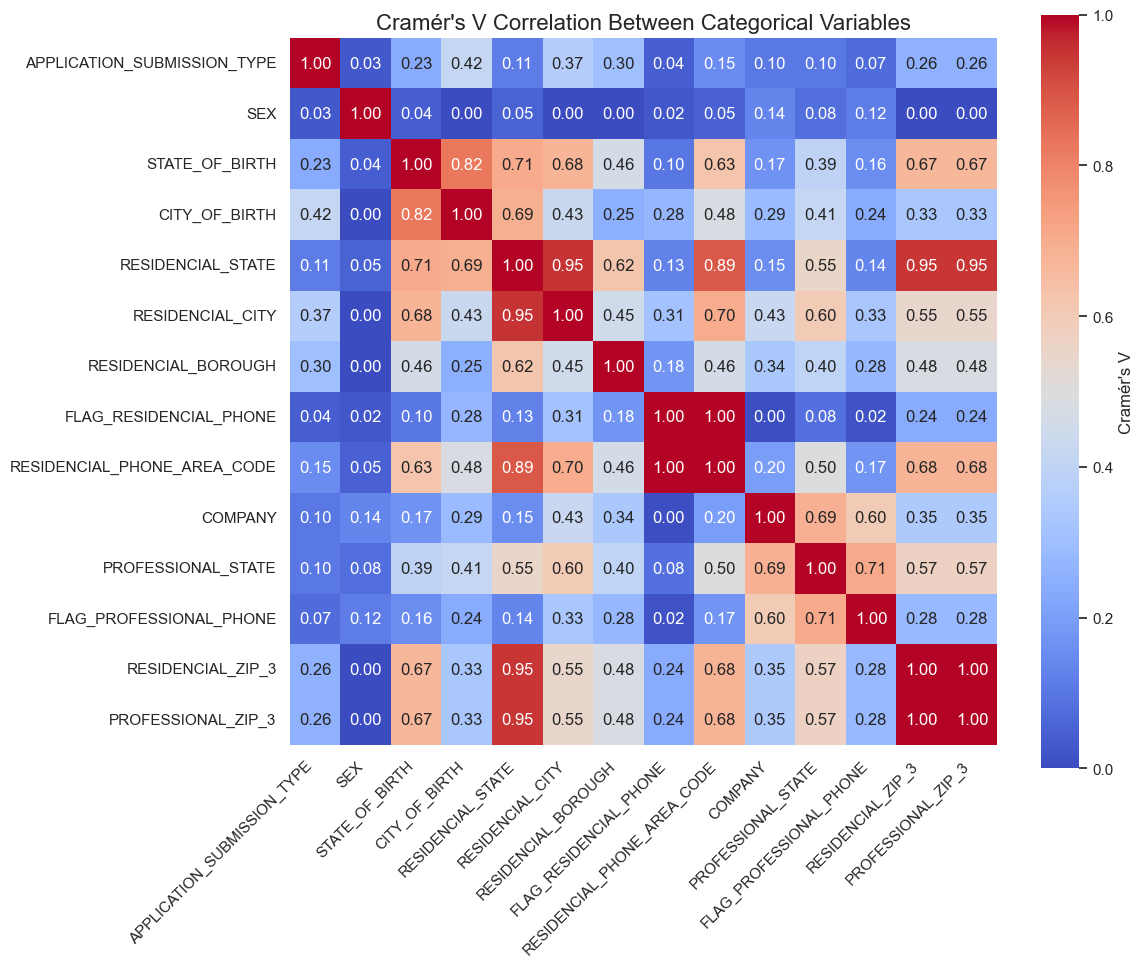

In [305]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = categorical_df1.columns
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(categorical_df1[col1], categorical_df1[col2])

cramers_results = cramers_results.astype(float)

plt.figure(figsize=(12,10))
sns.heatmap(cramers_results, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={'label': "Cramér's V"})
plt.title("Cramér's V Correlation Between Categorical Variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [26]:
#dropping column based on domain knowledge
categorical_df2=categorical_df1.drop(columns=['PROFESSIONAL_ZIP_3'])

In [27]:
#dropping columns based on high missing values
'''categorical_df3=categorical_df2.drop(columns=['PROFESSIONAL_STATE','APPLICATION_SUBMISSION_TYPE'])
categorical_df3.shape'''

"categorical_df3=categorical_df2.drop(columns=['PROFESSIONAL_STATE','APPLICATION_SUBMISSION_TYPE'])\ncategorical_df3.shape"

In [28]:
#dropping STATE_OF_BIRTH because of low predictive power compared to CITY_OF_BIRTH
'''categorical_df3=categorical_df3.drop(columns=['STATE_OF_BIRTH'])'''

"categorical_df3=categorical_df3.drop(columns=['STATE_OF_BIRTH'])"

In [29]:
categorical_df3=categorical_df2.drop(columns=['PROFESSIONAL_STATE'])

In [30]:
print(categorical_df3.shape)
print(numerical_df2.shape)
categorical_df3.info()

(50000, 12)
(50000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   APPLICATION_SUBMISSION_TYPE  50000 non-null  object
 1   SEX                          50000 non-null  object
 2   STATE_OF_BIRTH               50000 non-null  object
 3   CITY_OF_BIRTH                50000 non-null  object
 4   RESIDENCIAL_STATE            50000 non-null  object
 5   RESIDENCIAL_CITY             50000 non-null  object
 6   RESIDENCIAL_BOROUGH          50000 non-null  object
 7   FLAG_RESIDENCIAL_PHONE       50000 non-null  object
 8   RESIDENCIAL_PHONE_AREA_CODE  50000 non-null  object
 9   COMPANY                      50000 non-null  object
 10  FLAG_PROFESSIONAL_PHONE      50000 non-null  object
 11  RESIDENCIAL_ZIP_3            50000 non-null  object
dtypes: object(12)
memory usage: 4.6+ MB


In [31]:
# numerical columns that behave as categorical-
# 1. PAYMENT_DAY 2. MARITAL_STATUS 3. NACIONALITY 4. FLAG_EMAIL 5. FLAG_VISA 6. FLAG_MASTERCARD 7.RESIDENCE_TYPE 8. PROFESSION_CODE 
# transfering these form numerical_df to categorical_df
# List of columns to transfer
cols_to_transfer = [
    'PAYMENT_DAY', 'MARITAL_STATUS', 'NACIONALITY',
    'FLAG_EMAIL', 'FLAG_VISA', 'FLAG_MASTERCARD',
    'RESIDENCE_TYPE', 'PROFESSION_CODE'
]

# Transfer the columns
categorical_df3[cols_to_transfer] = numerical_df2[cols_to_transfer]

# Drop the columns from numerical_df
numerical_df2 = numerical_df2.drop(columns=cols_to_transfer)


In [32]:
numerical_df2.shape

(50000, 11)

In [33]:
categorical_df3.shape

(50000, 20)

In [34]:
for col in categorical_df3.columns:
    print(f"\n--- {col} ---")
    print(categorical_df3[col].value_counts(dropna=False))



--- APPLICATION_SUBMISSION_TYPE ---
APPLICATION_SUBMISSION_TYPE
Web      28206
0        19461
Carga     2333
Name: count, dtype: int64

--- SEX ---
SEX
F    30805
M    19130
N       48
        17
Name: count, dtype: int64

--- STATE_OF_BIRTH ---
STATE_OF_BIRTH
BA    5717
SP    5695
RS    5017
CE    4786
PE    4098
MG    3776
      2064
RN    2008
PR    1971
RJ    1826
PA    1692
AL    1645
PB    1609
MA    1416
GO    1143
MT     849
SC     707
PI     675
ES     638
MS     496
AC     474
SE     356
AM     354
DF     310
TO     244
AP     236
RO     155
RR      42
XX       1
Name: count, dtype: int64

--- CITY_OF_BIRTH ---
CITY_OF_BIRTH
                      2064
RIO DE JANEIRO        1184
RECIFE                 781
SAO PAULO              781
FORTALEZA              765
                      ... 
urania                   1
ESP STO TURVO            1
Varzea de Palma          1
STA IZABEL DO PARA       1
PIQUET CARNEIRO CE       1
Name: count, Length: 9910, dtype: int64

--- RESIDENCIAL_ST

In [35]:
# List of features you want to analyze
features = ['QUANT_DEPENDANTS']  # <-- replace/add your features

# Compute the 95th and 99th percentiles
percentiles = numerical_df2[features].quantile([0.95, 0.99])

# Display the result
print(percentiles)


      QUANT_DEPENDANTS
0.95               3.0
0.99               5.0


## Handling missing values

In [37]:
numerical_df2['PERSONAL_ASSETS_VALUE'].value_counts()

PERSONAL_ASSETS_VALUE
0.0         47609
30000.0       222
25000.0       198
50000.0       196
15000.0       185
            ...  
140000.0        1
27000.0         1
18500.0         1
8900.0          1
10500.0         1
Name: count, Length: 153, dtype: int64

In [38]:
numerical_df2['OTHER_INCOMES'].value_counts()

OTHER_INCOMES
0.0       47227
350.0       359
200.0       150
300.0       143
400.0       136
          ...  
1155.0        1
494.0         1
1720.0        1
477.0         1
367.0         1
Name: count, Length: 615, dtype: int64

In [39]:

numerical_df2['PERSONAL_ASSETS_LOG'] = np.log1p(numerical_df2['PERSONAL_ASSETS_VALUE'])
numerical_df2['OTHER_INCOMES_LOG'] = np.log1p(numerical_df2['OTHER_INCOMES'])

In [40]:
numerical_df2['PERSONAL_ASSETS_LOG'].value_counts()

PERSONAL_ASSETS_LOG
0.000000     47609
10.308986      222
10.126671      198
10.819798      196
9.615872       185
             ...  
11.849405        1
10.203629        1
9.825580         1
9.093919         1
9.259226         1
Name: count, Length: 153, dtype: int64

In [41]:
from sklearn.feature_selection import mutual_info_classif

X = numerical_df2[['PERSONAL_ASSETS_LOG', 'OTHER_INCOMES_LOG','AGE']]
y = df['TARGET_LABEL_BAD']  # your actual target

mi = mutual_info_classif(X, y)
for col, score in zip(X.columns, mi):
    print(f"{col}: Mutual Information Score = {score:.3f}")

PERSONAL_ASSETS_LOG: Mutual Information Score = 0.000
OTHER_INCOMES_LOG: Mutual Information Score = 0.000
AGE: Mutual Information Score = 0.010


In [42]:
#creating a binary flag for these two features since most of the values in them are 0
numerical_df2['HAS_PERSONAL_ASSETS'] = (numerical_df2['PERSONAL_ASSETS_VALUE'] > 0).astype(int)
numerical_df2['HAS_OTHER_INCOME'] = (numerical_df2['OTHER_INCOMES'] > 0).astype(int)

In [43]:
numerical_df2.drop(columns=['PERSONAL_ASSETS_VALUE', 'OTHER_INCOMES',
                            'PERSONAL_ASSETS_LOG', 'OTHER_INCOMES_LOG'], inplace=True)

In [44]:
numerical_df2.shape

(50000, 11)

In [45]:
# Transfer the flags to categorical_df3
categorical_df3['HAS_PERSONAL_ASSETS'] = numerical_df2['HAS_PERSONAL_ASSETS']
categorical_df3['HAS_OTHER_INCOME'] = numerical_df2['HAS_OTHER_INCOME']
categorical_df3['OCCUPATION_TYPE'] = numerical_df2['OCCUPATION_TYPE']
# Then drop from numerical_df2
numerical_df2.drop(columns=['HAS_PERSONAL_ASSETS', 'HAS_OTHER_INCOME','OCCUPATION_TYPE'], inplace=True)


In [46]:
categorical_df3['PRODUCT'] = numerical_df2['PRODUCT']
numerical_df2.drop(columns=['PRODUCT'], inplace=True)

In [47]:
numerical_df2.shape

(50000, 7)

In [48]:
#impute with median- 1. MONTHS_IN_RESIDENCE 
numerical_df2['MONTHS_IN_RESIDENCE'] = numerical_df2['MONTHS_IN_RESIDENCE'].fillna(numerical_df2['MONTHS_IN_RESIDENCE'].median())


In [49]:
numerical_df2.isnull().sum()

QUANT_DEPENDANTS                  0
MONTHS_IN_RESIDENCE               0
PERSONAL_MONTHLY_INCOME           0
QUANT_SPECIAL_BANKING_ACCOUNTS    0
QUANT_CARS                        0
AGE                               0
TARGET_LABEL_BAD                  0
dtype: int64

In [50]:
categorical_df3.isnull().sum()

APPLICATION_SUBMISSION_TYPE       0
SEX                               0
STATE_OF_BIRTH                    0
CITY_OF_BIRTH                     0
RESIDENCIAL_STATE                 0
RESIDENCIAL_CITY                  0
RESIDENCIAL_BOROUGH               0
FLAG_RESIDENCIAL_PHONE            0
RESIDENCIAL_PHONE_AREA_CODE       0
COMPANY                           0
FLAG_PROFESSIONAL_PHONE           0
RESIDENCIAL_ZIP_3                 0
PAYMENT_DAY                       0
MARITAL_STATUS                    0
NACIONALITY                       0
FLAG_EMAIL                        0
FLAG_VISA                         0
FLAG_MASTERCARD                   0
RESIDENCE_TYPE                 1349
PROFESSION_CODE                7756
HAS_PERSONAL_ASSETS               0
HAS_OTHER_INCOME                  0
OCCUPATION_TYPE                7313
PRODUCT                           0
dtype: int64

In [51]:
# imputing 'SEX' with mode 
categorical_df3['SEX'] = categorical_df3['SEX'].replace(['N', ' '], 'F')


In [52]:
categorical_df3['SEX'].value_counts()

SEX
F    30870
M    19130
Name: count, dtype: int64

### Checking correlation of categorical features with Target label
1. Target encoding
2. Frequency encoding
3. grouping categories 

In [54]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

# Cramér’s V computation function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Filter categorical columns only (exclude numeric types)
categorical_cols = df.select_dtypes(include=['object', 'category'], exclude=['number']).columns.tolist()

# Compute Cramér’s V against the target
cramers_v_scores = {}

for col in categorical_cols:
    if df[col].nunique() > 1:
        try:
            v = cramers_v(df[col].astype(str), df['TARGET_LABEL_BAD'])
            cramers_v_scores[col] = v
        except:
            continue

# Create and display sorted DataFrame
cramers_v_df = pd.DataFrame.from_dict(cramers_v_scores, orient='index', columns=['Cramers_V'])
cramers_v_df = cramers_v_df.sort_values(by='Cramers_V', ascending=False)

print(cramers_v_df)


                              Cramers_V
RESIDENCIAL_BOROUGH            0.560843
CITY_OF_BIRTH                  0.451380
PROFESSIONAL_BOROUGH           0.342068
RESIDENCIAL_CITY               0.306520
PROFESSIONAL_CITY              0.233801
PROFESSIONAL_ZIP_3             0.186856
RESIDENCIAL_ZIP_3              0.186856
RESIDENCIAL_PHONE_AREA_CODE    0.107847
PROFESSIONAL_PHONE_AREA_CODE   0.072736
FLAG_RESIDENCIAL_PHONE         0.060689
RESIDENCIAL_STATE              0.054302
STATE_OF_BIRTH                 0.050151
PROFESSIONAL_STATE             0.043669
SEX                            0.024006
APPLICATION_SUBMISSION_TYPE    0.021853
FLAG_PROFESSIONAL_PHONE        0.015808
COMPANY                        0.008236


In [55]:
#Replacing the blank values with nan
categorical_df3['CITY_OF_BIRTH'] = categorical_df3['CITY_OF_BIRTH'].replace(' ', np.nan)

In [56]:
#Replacing the blank values with nan
categorical_df3['STATE_OF_BIRTH'] = categorical_df3['STATE_OF_BIRTH'].replace(' ', np.nan)

In [57]:
#Replacing the undefined value'2' in NACIONALITY with Mode
categorical_df3['NACIONALITY'] = categorical_df3['NACIONALITY'].replace(2,1)

### Missing values in categorical columns-
2. CITY_OF_BIRTH - Nan (2064)
3. RESIDENCE_TYPE - Nan (1349)- Impute with mode
4. PROFESSION_CODE - NaN (7756)
5. OCCUPATION_TYPE - nAN (7313)

In [59]:
# Convert selected numeric-looking categorical columns to strings
categorical_columns_to_string = ['OCCUPATION_TYPE', 'PROFESSION_CODE','PAYMENT_DAY','MARITAL_STATUS']

for col in categorical_columns_to_string:
    categorical_df3[col] = categorical_df3[col].astype(str)

In [60]:
print(categorical_df3.dtypes)

APPLICATION_SUBMISSION_TYPE     object
SEX                             object
STATE_OF_BIRTH                  object
CITY_OF_BIRTH                   object
RESIDENCIAL_STATE               object
RESIDENCIAL_CITY                object
RESIDENCIAL_BOROUGH             object
FLAG_RESIDENCIAL_PHONE          object
RESIDENCIAL_PHONE_AREA_CODE     object
COMPANY                         object
FLAG_PROFESSIONAL_PHONE         object
RESIDENCIAL_ZIP_3               object
PAYMENT_DAY                     object
MARITAL_STATUS                  object
NACIONALITY                      int64
FLAG_EMAIL                       int64
FLAG_VISA                        int64
FLAG_MASTERCARD                  int64
RESIDENCE_TYPE                 float64
PROFESSION_CODE                 object
HAS_PERSONAL_ASSETS              int32
HAS_OTHER_INCOME                 int32
OCCUPATION_TYPE                 object
PRODUCT                          int64
dtype: object


In [61]:
#converting Y/N binary categorical columns to 0/1
binary_cols = ['COMPANY', 'FLAG_PROFESSIONAL_PHONE','FLAG_RESIDENCIAL_PHONE']

for col in binary_cols:
    categorical_df3[col] = categorical_df3[col].map({'Y': 1, 'N': 0})


In [62]:
categorical_df3['SEX'] = categorical_df3['SEX'].replace({'M': 1, 'F': 0}).infer_objects(copy=False)

C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\3737392204.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical_df3['SEX'] = categorical_df3['SEX'].replace({'M': 1, 'F': 0}).infer_objects(copy=False)


In [63]:
# transferring binary columns to nuemrcial_df2
binary_columns = []
for col in categorical_df3.columns:
    unique_values = categorical_df3[col].dropna().unique()
    if len(unique_values) == 2:
        binary_columns.append(col)

print(f"Identified binary columns in categorical_df3: {binary_columns}")

for col in binary_columns:
    numerical_df2[col] = categorical_df3[col].astype(int) # Or .astype(float) depending on your needs
categorical_df3 = categorical_df3.drop(columns=binary_columns)



Identified binary columns in categorical_df3: ['SEX', 'FLAG_RESIDENCIAL_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE', 'NACIONALITY', 'FLAG_EMAIL', 'FLAG_VISA', 'FLAG_MASTERCARD', 'HAS_PERSONAL_ASSETS', 'HAS_OTHER_INCOME']


In [64]:

categorical_df3['PROFESSION_CODE'].replace(['NaN', '', 'nan'], np.nan, inplace=True)
categorical_df3['OCCUPATION_TYPE'].replace(['NaN', '', 'nan'], np.nan, inplace=True)


C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\3578069658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_df3['PROFESSION_CODE'].replace(['NaN', '', 'nan'], np.nan, inplace=True)
C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\3578069658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [65]:
#Low cadinality columns - PAYMENT_DAY, MARITAL_STATUS, RESIDENCE_TYPE, PROFESSION_CODE, OCCUPATION_TYPE 
# impute missing values with mode - RESIDENCE_TYPE, PROFESSION_CODE, OCCUPATION_TYPE 
from sklearn.impute import SimpleImputer

cat_cols_basic = ['RESIDENCE_TYPE', 'PROFESSION_CODE', 'OCCUPATION_TYPE']
mode_imputer = SimpleImputer(strategy='most_frequent')
categorical_df3[cat_cols_basic] = mode_imputer.fit_transform(categorical_df3[cat_cols_basic])



In [66]:
#high cardinality columns
# replacing NaNs by missing category
categorical_df3['CITY_OF_BIRTH'] = categorical_df3['CITY_OF_BIRTH'].fillna('Missing')
categorical_df3['RESIDENCIAL_CITY'] = categorical_df3['RESIDENCIAL_CITY'].fillna('Missing')
categorical_df3['RESIDENCIAL_BOROUGH'] = categorical_df3['RESIDENCIAL_BOROUGH'].fillna('Missing')
categorical_df3['STATE_OF_BIRTH'] = categorical_df3['STATE_OF_BIRTH'].fillna('Missing')

In [67]:
for col in categorical_df3.columns:
    print(f"\n--- {col} ---")
    print(categorical_df3[col].value_counts(dropna=False))


--- APPLICATION_SUBMISSION_TYPE ---
APPLICATION_SUBMISSION_TYPE
Web      28206
0        19461
Carga     2333
Name: count, dtype: int64

--- STATE_OF_BIRTH ---
STATE_OF_BIRTH
BA         5717
SP         5695
RS         5017
CE         4786
PE         4098
MG         3776
Missing    2064
RN         2008
PR         1971
RJ         1826
PA         1692
AL         1645
PB         1609
MA         1416
GO         1143
MT          849
SC          707
PI          675
ES          638
MS          496
AC          474
SE          356
AM          354
DF          310
TO          244
AP          236
RO          155
RR           42
XX            1
Name: count, dtype: int64

--- CITY_OF_BIRTH ---
CITY_OF_BIRTH
Missing               2064
RIO DE JANEIRO        1184
RECIFE                 781
SAO PAULO              781
FORTALEZA              765
                      ... 
urania                   1
ESP STO TURVO            1
Varzea de Palma          1
STA IZABEL DO PARA       1
PIQUET CARNEIRO CE       1
N

In [68]:
categorical_df3.isnull().sum()

APPLICATION_SUBMISSION_TYPE    0
STATE_OF_BIRTH                 0
CITY_OF_BIRTH                  0
RESIDENCIAL_STATE              0
RESIDENCIAL_CITY               0
RESIDENCIAL_BOROUGH            0
RESIDENCIAL_PHONE_AREA_CODE    0
RESIDENCIAL_ZIP_3              0
PAYMENT_DAY                    0
MARITAL_STATUS                 0
RESIDENCE_TYPE                 0
PROFESSION_CODE                0
OCCUPATION_TYPE                0
PRODUCT                        0
dtype: int64

In [69]:
numerical_df2.isnull().sum()

QUANT_DEPENDANTS                  0
MONTHS_IN_RESIDENCE               0
PERSONAL_MONTHLY_INCOME           0
QUANT_SPECIAL_BANKING_ACCOUNTS    0
QUANT_CARS                        0
AGE                               0
TARGET_LABEL_BAD                  0
SEX                               0
FLAG_RESIDENCIAL_PHONE            0
COMPANY                           0
FLAG_PROFESSIONAL_PHONE           0
NACIONALITY                       0
FLAG_EMAIL                        0
FLAG_VISA                         0
FLAG_MASTERCARD                   0
HAS_PERSONAL_ASSETS               0
HAS_OTHER_INCOME                  0
dtype: int64

## Outlier handling
Capping at 99%

In [71]:
#QUANT_DEPENDANTS, MONTHS_IN_RESIDENCE, PERSONAL_MONTHLY_INCOME
# List of columns to cap
cap_columns = ['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME']

# Cap each column at its 99th percentile
for col in cap_columns:
    upper_limit = numerical_df2[col].quantile(0.99)
    numerical_df2[col] = numerical_df2[col].clip(upper=upper_limit)


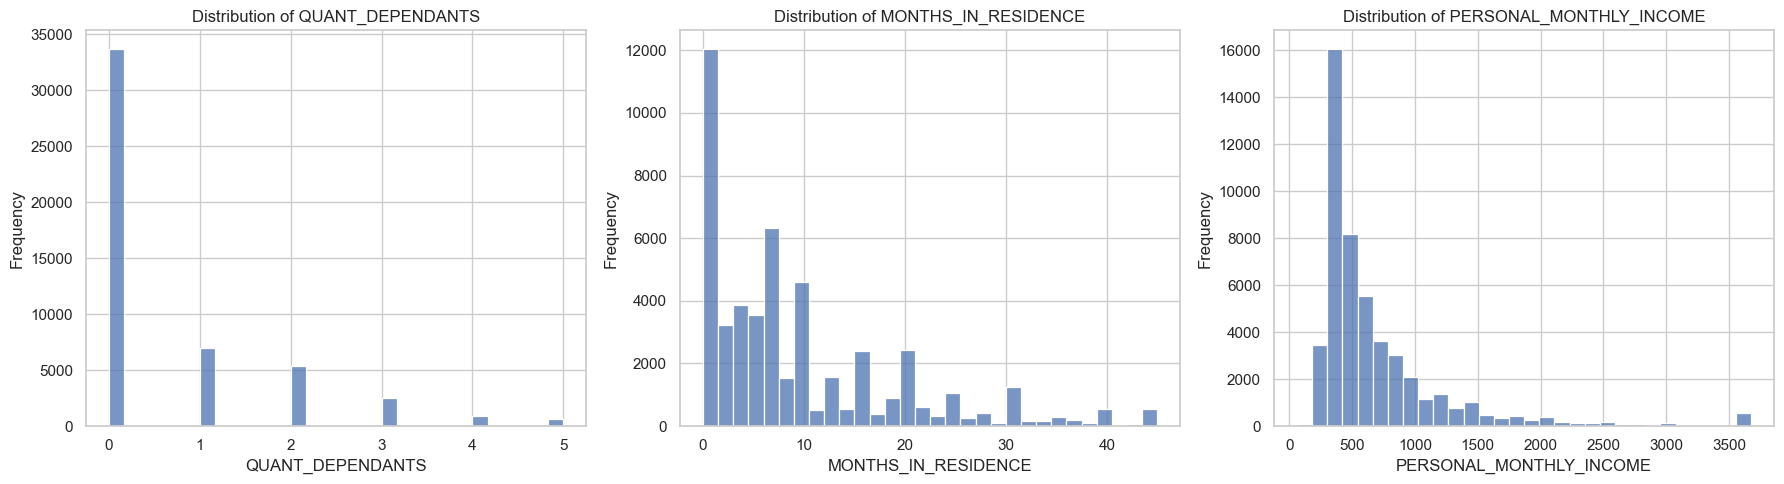

In [72]:

import matplotlib.pyplot as plt
import seaborn as sns
cap_columns = ['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME']
df_plot = numerical_df2[cap_columns]

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot barplots for each column
for i, col in enumerate(cap_columns):
    sns.histplot(df_plot[col], bins=30, ax=axes[i], kde=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##  FINAL PREPROCESSING PIPELINE

In [74]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [75]:
target_encode_cols = ['CITY_OF_BIRTH', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'RESIDENCIAL_STATE', 'STATE_OF_BIRTH','RESIDENCIAL_ZIP_3','RESIDENCIAL_PHONE_AREA_CODE']
onehot_encode_cols = ['PROFESSION_CODE', 'MARITAL_STATUS', 'RESIDENCE_TYPE', 'PAYMENT_DAY','OCCUPATION_TYPE','PRODUCT','APPLICATION_SUBMISSION_TYPE']


In [76]:
cat_cols = categorical_df3.columns.tolist()
num_cols = numerical_df2.drop(columns=['TARGET_LABEL_BAD']).columns.tolist()
target_col = 'TARGET_LABEL_BAD'

Function for model evaluation

In [78]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    
    # If model supports predict_proba, use it for ROC AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = None

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    # Print Summary
    print("✅ Classification Metrics")
    print("----------------------------------------")
    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"ROC-AUC Score  : {roc_auc:.4f}" if roc_auc != "N/A" else "ROC-AUC Score  : N/A")

    print("\n✅ Classification Report")
    print("----------------------------------------")
    print(classification_report(y_test, y_pred))

    print("✅ Confusion Matrix")
    print("----------------------------------------")
    print(confusion_matrix(y_test, y_pred))


### Train test split

In [80]:
from sklearn.model_selection import train_test_split
X_full = pd.concat([numerical_df2[num_cols], categorical_df3[cat_cols]], axis=1)
y = numerical_df2[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, stratify=y, random_state=42
)
# Reset index after splitting
X_train_cat = X_train[cat_cols].reset_index(drop=True)
X_test_cat = X_test[cat_cols].reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)  # optional if needed later

### 1. Defining 3 separate pipelines, one for numerical and other two for different types of categorical based on cardinality

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# 1. Define preprocessing pipelines

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Target encoding pipeline
target_enc_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target', TargetEncoder())
])

# One-hot encoding pipeline
ohe_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [83]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('target', target_enc_pipeline, target_encode_cols),
    ('ohe', ohe_pipeline, onehot_encode_cols)
])


In [84]:
'''cat_cols = categorical_df3.columns.tolist()
num_cols = numerical_df2.drop(columns=['TARGET_LABEL_BAD']).columns.tolist()
target_col = 'TARGET_LABEL_BAD'
'''


"cat_cols = categorical_df3.columns.tolist()\nnum_cols = numerical_df2.drop(columns=['TARGET_LABEL_BAD']).columns.tolist()\ntarget_col = 'TARGET_LABEL_BAD'\n"

In [85]:
'''X_full = pd.concat([numerical_df2[num_cols], categorical_df3[cat_cols]], axis=1)
y = numerical_df2[target_col]
'''

'X_full = pd.concat([numerical_df2[num_cols], categorical_df3[cat_cols]], axis=1)\ny = numerical_df2[target_col]\n'

In [86]:
'''from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, stratify=y, random_state=42
)
# Reset index after splitting
X_train_cat = X_train[cat_cols].reset_index(drop=True)
X_test_cat = X_test[cat_cols].reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)  # optional if needed later
'''

'from sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(\n    X_full, y, test_size=0.2, stratify=y, random_state=42\n)\n# Reset index after splitting\nX_train_cat = X_train[cat_cols].reset_index(drop=True)\nX_test_cat = X_test[cat_cols].reset_index(drop=True)\ny_train = y_train.reset_index(drop=True)\ny_test = y_test.reset_index(drop=True)  # optional if needed later\n'

In [87]:
'''from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Numerical imputation
num_imputer = SimpleImputer(strategy='median')
X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)

# Categorical imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_cols]), columns=cat_cols)
X_test_cat = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)
'''

"from sklearn.impute import SimpleImputer\nimport pandas as pd\nimport numpy as np\n\n# Numerical imputation\nnum_imputer = SimpleImputer(strategy='median')\nX_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]), columns=num_cols)\nX_test_num = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)\n\n# Categorical imputation\ncat_imputer = SimpleImputer(strategy='most_frequent')\nX_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_cols]), columns=cat_cols)\nX_test_cat = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)\n"

In [88]:
'''import category_encoders as ce

encoder = ce.TargetEncoder(cols=cat_cols)
X_train_cat_encoded = encoder.fit_transform(X_train_cat, y_train)
X_test_cat_encoded = encoder.transform(X_test_cat)
'''

'import category_encoders as ce\n\nencoder = ce.TargetEncoder(cols=cat_cols)\nX_train_cat_encoded = encoder.fit_transform(X_train_cat, y_train)\nX_test_cat_encoded = encoder.transform(X_test_cat)\n'

In [89]:
'''import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

# 1. Define columns by encoding strategy
target_encode_cols = ['CITY_OF_BIRTH', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'RESIDENCIAL_STATE', 'STATE_OF_BIRTH','RESIDENCIAL_ZIP_3','RESIDENCIAL_PHONE_AREA_CODE']
onehot_encode_cols = ['PROFESSION_CODE', 'MARITAL_STATUS', 'RESIDENCE_TYPE', 'PAYMENT_DAY','OCCUPATION_TYPE','PRODUCT','APPLICATION_SUBMISSION_TYPE']

# 2. Target Encoding
target_encoder = ce.TargetEncoder(cols=target_encode_cols)
X_train_target_encoded = target_encoder.fit_transform(X_train_cat[target_encode_cols], y_train)
X_test_target_encoded = target_encoder.transform(X_test_cat[target_encode_cols])

# 3. One-Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_ohe = pd.DataFrame(
    ohe.fit_transform(X_train_cat[onehot_encode_cols]),
    columns=ohe.get_feature_names_out(onehot_encode_cols),
    index=X_train_cat.index
)
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_cat[onehot_encode_cols]),
    columns=ohe.get_feature_names_out(onehot_encode_cols),
    index=X_test_cat.index
)

# 4. Combine Encoded Features
X_train_cat_encoded = pd.concat([X_train_target_encoded, X_train_ohe], axis=1)
X_test_cat_encoded = pd.concat([X_test_target_encoded, X_test_ohe], axis=1)
'''

"import category_encoders as ce\nfrom sklearn.preprocessing import OneHotEncoder\n\n# 1. Define columns by encoding strategy\ntarget_encode_cols = ['CITY_OF_BIRTH', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'RESIDENCIAL_STATE', 'STATE_OF_BIRTH','RESIDENCIAL_ZIP_3','RESIDENCIAL_PHONE_AREA_CODE']\nonehot_encode_cols = ['PROFESSION_CODE', 'MARITAL_STATUS', 'RESIDENCE_TYPE', 'PAYMENT_DAY','OCCUPATION_TYPE','PRODUCT','APPLICATION_SUBMISSION_TYPE']\n\n# 2. Target Encoding\ntarget_encoder = ce.TargetEncoder(cols=target_encode_cols)\nX_train_target_encoded = target_encoder.fit_transform(X_train_cat[target_encode_cols], y_train)\nX_test_target_encoded = target_encoder.transform(X_test_cat[target_encode_cols])\n\n# 3. One-Hot Encoding\nohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)\nX_train_ohe = pd.DataFrame(\n    ohe.fit_transform(X_train_cat[onehot_encode_cols]),\n    columns=ohe.get_feature_names_out(onehot_encode_cols),\n    index=X_train_cat.index\n)\nX_test_ohe = pd.Da

In [90]:
'''X_train_final = pd.concat([X_train_num, X_train_cat_encoded], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_encoded], axis=1)
'''

'X_train_final = pd.concat([X_train_num, X_train_cat_encoded], axis=1)\nX_test_final = pd.concat([X_test_num, X_test_cat_encoded], axis=1)\n'

In [91]:
'''from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler =StandardScaler()
X_train_final[num_cols] = scaler.fit_transform(X_train_final[num_cols])
X_test_final[num_cols] = scaler.transform(X_test_final[num_cols])
'''

'from sklearn.preprocessing import MinMaxScaler, StandardScaler\n\nscaler =StandardScaler()\nX_train_final[num_cols] = scaler.fit_transform(X_train_final[num_cols])\nX_test_final[num_cols] = scaler.transform(X_test_final[num_cols])\n'

In [92]:
import evidently

C:\Users\ASUS SMART\anaconda3\Lib\site-packages\evidently\core\metric_types.py:376: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  np_bool = np.bool  # type: ignore[attr-defined]


### Using Selectk Best

In [94]:
'''from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=50)  # select top 50
X_train_selected = selector.fit_transform(X_train_final, y_train)
X_test_selected = selector.transform(X_test_final)

# Optional: get selected feature names
selected_features = X_train_final.columns[selector.get_support()]'''


'from sklearn.feature_selection import SelectKBest, mutual_info_classif\n\nselector = SelectKBest(score_func=mutual_info_classif, k=50)  # select top 50\nX_train_selected = selector.fit_transform(X_train_final, y_train)\nX_test_selected = selector.transform(X_test_final)\n\n# Optional: get selected feature names\nselected_features = X_train_final.columns[selector.get_support()]'

## Baseline model(logistic reg)

In [96]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # does imputation + encoding
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=55)),  # choose k as needed
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

In [97]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
print("Cross-validated ROC-AUC:", cv_scores.mean())


Cross-validated ROC-AUC: 0.5935800280143873


In [198]:
logreg_pipeline.fit(X_train, y_train)
evaluate_model(logreg_pipeline, X_test, y_test)

✅ Classification Metrics
----------------------------------------
Accuracy       : 0.7043
Precision      : 0.3594
Recall         : 0.1710
F1 Score       : 0.2317
ROC-AUC Score  : 0.5924

✅ Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.89      0.82      7392
           1       0.36      0.17      0.23      2608

    accuracy                           0.70     10000
   macro avg       0.56      0.53      0.52     10000
weighted avg       0.65      0.70      0.66     10000

✅ Confusion Matrix
----------------------------------------
[[6597  795]
 [2162  446]]


logreg_pipeline.fit(X_train, y_train)
evaluate_model(logreg_pipeline, X_test, y_test)  # use your previous function


Baseline model had good ROC-AUC score but compromised severely on balancing minority class

There is imbalance for class 1 causing a drop of Precision and recall

## Testing the baseline model on raw data

In [102]:
'''df = pd.read_csv("PAKDD_Modelling_data.csv")

# Drop ID column
df.drop(columns=["ID_CLIENT"], inplace=True)

# Separate target
target = df["TARGET_LABEL_BAD"]
df.drop(columns=["TARGET_LABEL_BAD"], inplace=True)

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=["int64", "float64"]).columns.tolist()

# Impute missing values
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Target encoding
encoder = TargetEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols], target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42, stratify=target)'''

'df = pd.read_csv("PAKDD_Modelling_data.csv")\n\n# Drop ID column\ndf.drop(columns=["ID_CLIENT"], inplace=True)\n\n# Separate target\ntarget = df["TARGET_LABEL_BAD"]\ndf.drop(columns=["TARGET_LABEL_BAD"], inplace=True)\n\n# Identify numeric and categorical columns\nnumeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()\ncategorical_cols = df.select_dtypes(exclude=["int64", "float64"]).columns.tolist()\n\n# Impute missing values\nnum_imputer = SimpleImputer(strategy="median")\ncat_imputer = SimpleImputer(strategy="most_frequent")\n\ndf[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])\ndf[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])\n\n# Target encoding\nencoder = TargetEncoder()\ndf[categorical_cols] = encoder.fit_transform(df[categorical_cols], target)\n\n# Train-test split\nX_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42, stratify=target)'

In [103]:
'''baseline_model = LogisticRegression(max_iter=1000, random_state=42)

# 2. Train the model
baseline_model.fit(X_train, y_train)

# 3. Make predictions
y_pred = baseline_model.predict(X_test)
y_prob = baseline_model.predict_proba(X_test)[:, 1]

# 4. Evaluate
print("📊 Baseline Logistic Regression Results")
print("-" * 40)
print("Accuracy       :", accuracy_score(y_test, y_pred))
print("Precision      :", precision_score(y_test, y_pred))
print("Recall         :", recall_score(y_test, y_pred))
print("F1 Score       :", f1_score(y_test, y_pred))
print("ROC-AUC Score  :", roc_auc_score(y_test, y_prob))

# 5. Detailed Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))'''

'baseline_model = LogisticRegression(max_iter=1000, random_state=42)\n\n# 2. Train the model\nbaseline_model.fit(X_train, y_train)\n\n# 3. Make predictions\ny_pred = baseline_model.predict(X_test)\ny_prob = baseline_model.predict_proba(X_test)[:, 1]\n\n# 4. Evaluate\nprint("📊 Baseline Logistic Regression Results")\nprint("-" * 40)\nprint("Accuracy       :", accuracy_score(y_test, y_pred))\nprint("Precision      :", precision_score(y_test, y_pred))\nprint("Recall         :", recall_score(y_test, y_pred))\nprint("F1 Score       :", f1_score(y_test, y_pred))\nprint("ROC-AUC Score  :", roc_auc_score(y_test, y_prob))\n\n# 5. Detailed Report\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\nprint("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))'

In [104]:
'''import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve

# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Baseline model on Raw Data')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# 3. Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(rec, prec, color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# 4. Bar Plot of Main Metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_prob)
}

plt.figure(figsize=(8,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")
plt.ylim(0,1)
plt.title("Performance of Baseline model on Raw Data")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()
'''

'import matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.metrics import roc_curve, precision_recall_curve\n\n# 1. Confusion Matrix Heatmap\ncm = confusion_matrix(y_test, y_pred)\nplt.figure(figsize=(5,4))\nsns.heatmap(cm, annot=True, fmt=\'d\', cmap=\'Blues\', xticklabels=[0,1], yticklabels=[0,1])\nplt.xlabel(\'Predicted\')\nplt.ylabel(\'Actual\')\nplt.title(\'Confusion Matrix of Baseline model on Raw Data\')\nplt.show()\n\n# 2. ROC Curve\nfpr, tpr, _ = roc_curve(y_test, y_prob)\nplt.figure(figsize=(6,4))\nplt.plot(fpr, tpr, label=f\'ROC-AUC = {roc_auc_score(y_test, y_prob):.2f}\')\nplt.plot([0, 1], [0, 1], linestyle=\'--\', color=\'gray\')\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'ROC Curve\')\nplt.legend()\nplt.grid(True)\nplt.show()\n\n# 3. Precision-Recall Curve\nprec, rec, _ = precision_recall_curve(y_test, y_prob)\nplt.figure(figsize=(6,4))\nplt.plot(rec, prec, color=\'darkorange\')\nplt.xlabel(\'Recall\')\nplt.ylabel(\'Pre

### Logistic Regression with SMOTE

In [200]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [202]:
smote_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),  # your imputation + encoding steps
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=40)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


In [204]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(smote_pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print("✅ Cross-validated ROC-AUC with SMOTE")
print("-" * 40)
print(f"Mean ROC-AUC : {cv_scores.mean():.4f}")
print(f"Std Dev      : {cv_scores.std():.4f}")


✅ Cross-validated ROC-AUC with SMOTE
----------------------------------------
Mean ROC-AUC : 0.5874
Std Dev      : 0.0081


In [105]:
smote_pipeline.fit(X_train, y_train)

y_pred = smote_pipeline.predict(X_test)
y_prob = smote_pipeline.predict_proba(X_test)[:, 1]

evaluate_model(smote_pipeline, X_test, y_test)  # your previous `evaluate_model()` function


✅ Classification Metrics
----------------------------------------
Accuracy       : 0.6219
Precision      : 0.3201
Recall         : 0.4003
F1 Score       : 0.3558
ROC-AUC Score  : 0.5793

✅ Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7392
           1       0.32      0.40      0.36      2608

    accuracy                           0.62     10000
   macro avg       0.54      0.55      0.54     10000
weighted avg       0.65      0.62      0.63     10000

✅ Confusion Matrix
----------------------------------------
[[5175 2217]
 [1564 1044]]


## Pie- chart of target feature distribution after mitigating data imbalance

C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\4033454786.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS SMART\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


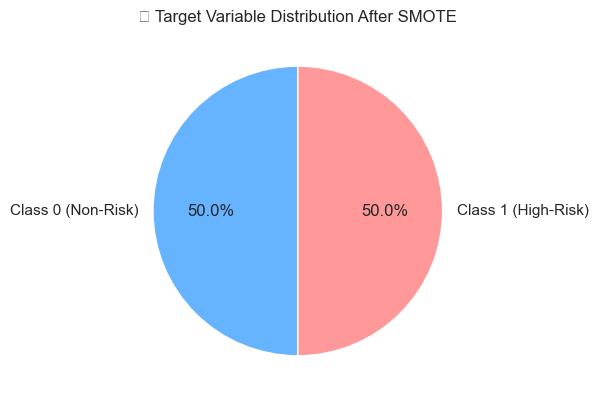

In [282]:
from imblearn.over_sampling import SMOTE

# Apply only the preprocessing and SMOTE steps
X_resampled, y_resampled = smote_pipeline.named_steps['smote'].fit_resample(
    smote_pipeline.named_steps['feature_selection'].fit_transform(
        smote_pipeline.named_steps['preprocessor'].fit_transform(X_train, y_train),
        y_train
    ), y_train)

# Plot pie chart
import matplotlib.pyplot as plt
import pandas as pd

# Convert to series to use value_counts easily
y_res_series = pd.Series(y_resampled)

# Plot
plt.figure(figsize=(6, 6))
y_res_series.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Class 0 (Non-Risk)', 'Class 1 (High-Risk)'],
    colors=['#66b3ff', '#ff9999']
)
plt.title("📊 Target Variable Distribution After SMOTE")
plt.ylabel("")
plt.tight_layout()
plt.show()


C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\243411822.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS SMART\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


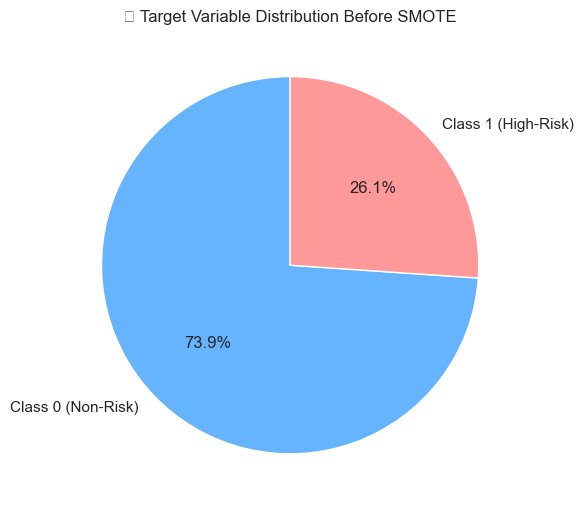

In [285]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_train to pandas Series if it's not already
y_train_series = pd.Series(y_train)

# Plot pie chart
plt.figure(figsize=(6, 6))
y_train_series.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Class 0 (Non-Risk)', 'Class 1 (High-Risk)'],
    colors=['#66b3ff', '#ff9999']
)
plt.title("📊 Target Variable Distribution Before SMOTE")
plt.ylabel("")
plt.tight_layout()
plt.show()


## Visualization of performance of different stages of data on Baseline model

C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\3161131714.py:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS SMART\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


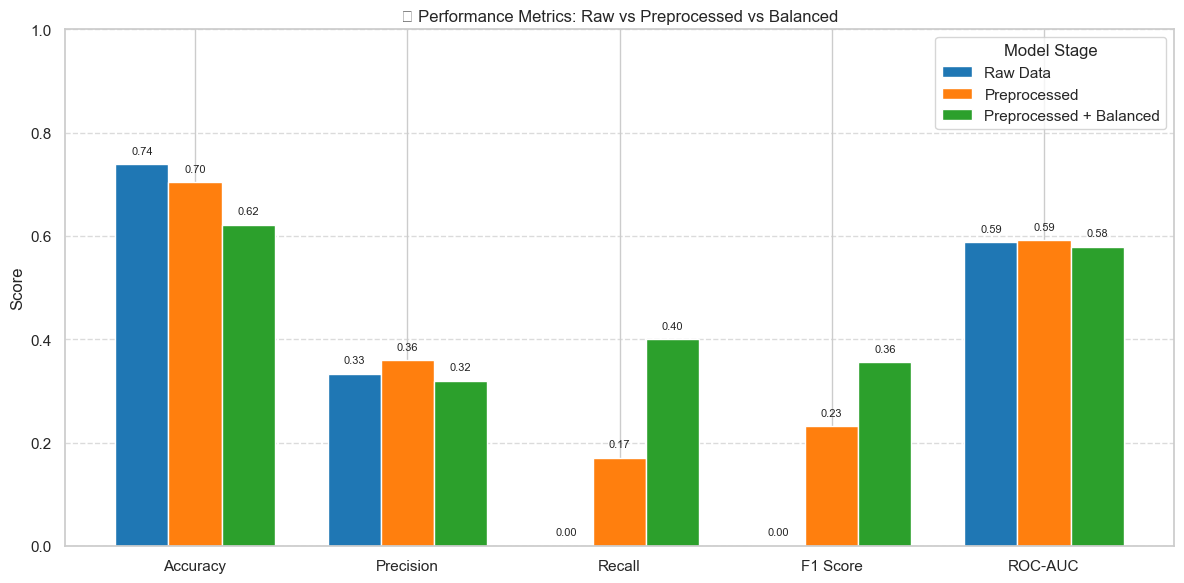

In [209]:
import matplotlib.pyplot as plt
import numpy as np

# X-axis labels
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

# Define metric values for each stage
raw_metrics         = [0.7391, 0.3333, 0.0004, 0.0008, 0.5876]
preprocessed_metrics = [0.7043, 0.3594, 0.1710, 0.2317, 0.5924]
balanced_metrics     = [0.6219, 0.3201, 0.4003, 0.3558, 0.5793]

# Combine into matrix for plotting
all_metrics = [raw_metrics, preprocessed_metrics, balanced_metrics]
stage_labels = ['Raw Data', 'Preprocessed', 'Preprocessed + Balanced']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Different colors for stages

x = np.arange(len(metric_names))  # Label positions
width = 0.25

plt.figure(figsize=(12,6))

# Plot each stage's bars
for i in range(len(all_metrics)):
    plt.bar(x + (i - 1) * width, all_metrics[i], width, label=stage_labels[i], color=colors[i])

# Add labels and formatting
plt.xticks(x, metric_names)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title(" Performance Metrics: Raw vs Preprocessed vs Balanced")
plt.legend(title='Model Stage')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with the metric value
for i in range(len(metric_names)):
    for j in range(len(all_metrics)):
        val = all_metrics[j][i]
        xpos = x[i] + (j - 1) * width
        plt.text(xpos, val + 0.02, f"{val:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()


C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\2008367315.py:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.92])
C:\Users\ASUS SMART\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


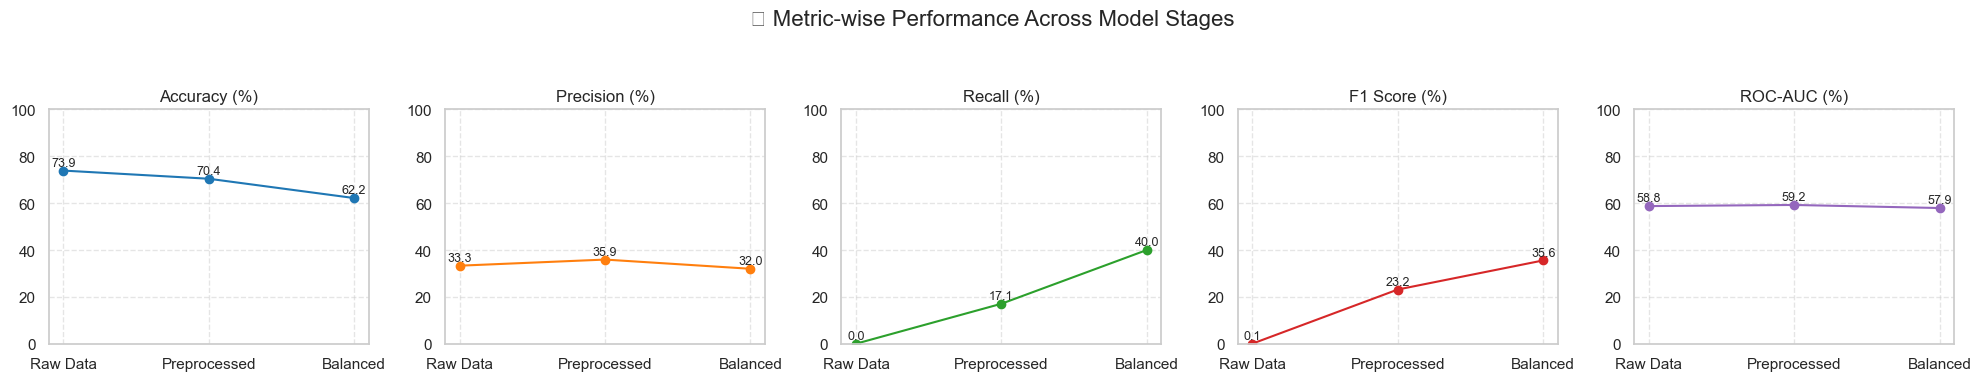

In [255]:
import matplotlib.pyplot as plt

# Data
stages = ['Raw Data', 'Preprocessed', 'Balanced']
accuracy =  [73.91, 70.43, 62.19]
precision = [33.33, 35.94, 32.01]
recall =    [0.04, 17.10, 40.03]
f1_score =  [0.08, 23.17, 35.58]
roc_auc =   [58.76, 59.24, 57.93]

# Plot setup
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=False)

metrics = {
    'Accuracy (%)': accuracy,
    'Precision (%)': precision,
    'Recall (%)': recall,
    'F1 Score (%)': f1_score,
    'ROC-AUC (%)': roc_auc
}

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Loop through metrics and create each subplot
for i, (name, values) in enumerate(metrics.items()):
    axs[i].plot(stages, values, marker='o', color=colors[i])
    axs[i].set_title(name)
    axs[i].set_ylim(0, 100)
    axs[i].grid(True, linestyle='--', alpha=0.5)
    axs[i].set_xticks(stages)
    for x, y in zip(stages, values):
        axs[i].text(x, y + 2, f"{y:.1f}", ha='center', fontsize=9)

# Final formatting
fig.suptitle("📊 Metric-wise Performance Across Model Stages", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()


Smote technique proved successful in balancing the dataset without compromising much on ROC-AUC but compromising on accuracy

### SMOTE with random forest 

In [245]:
smote_rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=40)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=42))
])

In [246]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(smote_rf_pipeline, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)

print("SMOTE + Random Forest ROC-AUC:", scores.mean())


SMOTE + Random Forest ROC-AUC: 0.5759835302025877


In [247]:
smote_rf_pipeline.fit(X_train, y_train)

y_pred = smote_rf_pipeline.predict(X_test)
y_prob = smote_rf_pipeline.predict_proba(X_test)[:, 1]

evaluate_model(smote_rf_pipeline, X_test, y_test)


✅ Classification Metrics
----------------------------------------
Accuracy       : 0.5685
Precision      : 0.3056
Recall         : 0.5146
F1 Score       : 0.3835
ROC-AUC Score  : 0.5817

✅ Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.59      0.67      7392
           1       0.31      0.51      0.38      2608

    accuracy                           0.57     10000
   macro avg       0.54      0.55      0.53     10000
weighted avg       0.65      0.57      0.59     10000

✅ Confusion Matrix
----------------------------------------
[[4343 3049]
 [1266 1342]]


SMOTE didn't work well with Random forest classifier

### Bias detection for sensitive features

In [ ]:
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Reusable bias dashboard function
def bias_dashboard(y_true, y_pred, sensitive_feature, feature_name="Sensitive Attribute"):
    frame = MetricFrame(
        metrics={
            'accuracy': accuracy_score,
            'precision': precision_score,
            'recall': recall_score,
            'selection_rate': selection_rate
        },
        y_true=y_true,
        y_pred=y_pred,
        sensitive_features=sensitive_feature
    )

    # Summary printout
    print(f"\n📊 Bias Dashboard for {feature_name}")
    print("=" * 50)
    print("Group-wise Metrics:\n", frame.by_group)
    print("Overall Metrics:\n", frame.overall)
    print("\nDisparity Metrics:")
    print("  Demographic Parity Difference:", round(demographic_parity_difference(y_true, y_pred, sensitive_features=sensitive_feature), 4))
    print("  Equalized Odds Difference     :", round(equalized_odds_difference(y_true, y_pred, sensitive_features=sensitive_feature), 4))

    # 📊 Plot the group-wise metrics
    fig, axes = plt.subplots(1, 4, figsize=(18, 5))
    for i, metric in enumerate(frame.by_group.columns):
        sns.barplot(
            x=frame.by_group.index.astype(str),
            y=frame.by_group[metric].values,
            ax=axes[i],
            palette='Set2'
        )
        axes[i].set_title(f'{metric} by {feature_name}')
        axes[i].set_xlabel(feature_name)
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


In [ ]:
bias_dashboard(y_test, y_pred, X_test['SEX'], "SEX")
bias_dashboard(y_test, y_pred, X_test['STATE_OF_BIRTH'], "STATE_OF_BIRTH")
bias_dashboard(y_test, y_pred, X_test['RESIDENCIAL_STATE'], "RESIDENCIAL_STATE")
# bias in STATE_OF_BIRTH and RESIDENCIAL_STATE

Hence, bias is high for STATE_OF_BIRTH and RESIDENCIAL_STATE columns. It is fine for SEX column

### Hyperparameter tuning

In [ ]:
'''from sklearn.model_selection import GridSearchCV, StratifiedKFold
xgb_base = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Step 2: Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'scale_pos_weight': [1, len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1])]
}

# Step 3: Define CV strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Run grid search
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_smote, y_train_smote)

# Step 5: Best model evaluation
best_xgb = grid_search.best_estimator_

# Predict
xgb_preds = best_xgb.predict(X_test_selected_55)
xgb_probs = best_xgb.predict_proba(X_test_selected_55)[:, 1]

# Evaluation
print("🚀 Tuned XGBoost Results")
print("-" * 40)
print(f"Best Parameters: {grid_search.best_params_}\n")
print(f"Accuracy       : {accuracy_score(y_test, xgb_preds):.4f}")
print(f"Precision      : {precision_score(y_test, xgb_preds):.4f}")
print(f"Recall         : {recall_score(y_test, xgb_preds):.4f}")
print(f"F1 Score       : {f1_score(y_test, xgb_preds):.4f}")
print(f"ROC-AUC Score  : {roc_auc_score(y_test, xgb_probs):.4f}\n")

print("Classification Report:\n", classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))'''

## Baseline XGB Model

In [268]:
xgb_base = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

In [270]:
base_xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # you already defined this ColumnTransformer
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=55)),  # or whatever value worked best
    ('classifier', xgb_base)  # your tuned model
])

In [272]:
base_xgb_pipeline.fit(X_train, y_train)

C:\Users\ASUS SMART\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:01:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['QUANT_DEPENDANTS',
                                                   'MONTHS_IN_RESIDENCE',
                                                   'PERSONAL_MONTHLY_INCOME',
                                                   'QUANT_SPECIAL_BANKING_ACCOUNTS',
                                                   'QUANT_CARS', 'AGE', 'SEX',
                                                   'FLAG_RESIDENCIAL_PHONE',
                                                   'COMPANY',
                                                   'FLAG_PROFESSIONAL_PHONE',
                                                   '...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [274]:
y_pred = base_xgb_pipeline.predict(X_test)
y_prob = base_xgb_pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("🚀 Base XGBoost Pipeline Results")
print("-" * 40)
print(f"Accuracy       : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision      : {precision_score(y_test, y_pred):.4f}")
print(f"Recall         : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score       : {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC Score  : {roc_auc_score(y_test, y_prob):.4f}\n")

print("✅ Classification Report")
print("-" * 40)
print(classification_report(y_test, y_pred))

print("✅ Confusion Matrix")
print("-" * 40)
print(confusion_matrix(y_test, y_pred))


🚀 Base XGBoost Pipeline Results
----------------------------------------
Accuracy       : 0.6900
Precision      : 0.3507
Recall         : 0.2216
F1 Score       : 0.2716
ROC-AUC Score  : 0.5783

✅ Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.86      0.80      7392
           1       0.35      0.22      0.27      2608

    accuracy                           0.69     10000
   macro avg       0.55      0.54      0.54     10000
weighted avg       0.65      0.69      0.66     10000

✅ Confusion Matrix
----------------------------------------
[[6322 1070]
 [2030  578]]


### Best XGB model

In [229]:
xgb_best_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,  
    subsample=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)



In [231]:
final_xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # you already defined this ColumnTransformer
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=55)),  # or whatever value worked best
    ('classifier', xgb_best_model)  # your tuned model
])


In [233]:
final_xgb_pipeline.fit(X_train, y_train)

C:\Users\ASUS SMART\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:29:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['QUANT_DEPENDANTS',
                                                   'MONTHS_IN_RESIDENCE',
                                                   'PERSONAL_MONTHLY_INCOME',
                                                   'QUANT_SPECIAL_BANKING_ACCOUNTS',
                                                   'QUANT_CARS', 'AGE', 'SEX',
                                                   'FLAG_RESIDENCIAL_PHONE',
                                                   'COMPANY',
                                                   'FLAG_PROFESSIONAL_PHONE',
                                                   '...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [234]:
y_pred = final_xgb_pipeline.predict(X_test)
y_prob = final_xgb_pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("🚀 Final XGBoost Pipeline Results")
print("-" * 40)
print(f"Accuracy       : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision      : {precision_score(y_test, y_pred):.4f}")
print(f"Recall         : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score       : {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC Score  : {roc_auc_score(y_test, y_prob):.4f}\n")

print("✅ Classification Report")
print("-" * 40)
print(classification_report(y_test, y_pred))

print("✅ Confusion Matrix")
print("-" * 40)
print(confusion_matrix(y_test, y_pred))


🚀 Final XGBoost Pipeline Results
----------------------------------------
Accuracy       : 0.6982
Precision      : 0.3665
Recall         : 0.2159
F1 Score       : 0.2717
ROC-AUC Score  : 0.5826

✅ Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      7392
           1       0.37      0.22      0.27      2608

    accuracy                           0.70     10000
   macro avg       0.56      0.54      0.54     10000
weighted avg       0.66      0.70      0.67     10000

✅ Confusion Matrix
----------------------------------------
[[6419  973]
 [2045  563]]


## Feature selection using XGB Model

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
'''from sklearn.model_selection import cross_val_score, StratifiedKFold

# Range of feature counts to try
feature_range = range(5, min(X_train.shape[1], 70) + 1, 5)

# Store AUC scores
auc_scores = []

# CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in feature_range:
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=k)),
        ('classifier', xgb_best_model)
    ])
    
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    mean_score = scores.mean()
    auc_scores.append(mean_score)
    print(f"✅ k = {k} | ROC-AUC = {mean_score:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(feature_range, auc_scores, marker='o', linestyle='-', color='royalblue')
plt.title('ROC-AUC vs Number of Selected Features')
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-Validated ROC-AUC')
plt.grid(True)
plt.tight_layout()
plt.show()
'''

'from sklearn.model_selection import cross_val_score, StratifiedKFold\n\n# Range of feature counts to try\nfeature_range = range(5, min(X_train.shape[1], 70) + 1, 5)\n\n# Store AUC scores\nauc_scores = []\n\n# CV setup\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\nfor k in feature_range:\n    pipe = Pipeline([\n        (\'preprocessor\', preprocessor),\n        (\'feature_selection\', SelectKBest(score_func=mutual_info_classif, k=k)),\n        (\'classifier\', xgb_best_model)\n    ])\n    \n    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring=\'roc_auc\', n_jobs=-1)\n    mean_score = scores.mean()\n    auc_scores.append(mean_score)\n    print(f"✅ k = {k} | ROC-AUC = {mean_score:.4f}")\n\n# Plot\nplt.figure(figsize=(10, 6))\nplt.plot(feature_range, auc_scores, marker=\'o\', linestyle=\'-\', color=\'royalblue\')\nplt.title(\'ROC-AUC vs Number of Selected Features\')\nplt.xlabel(\'Number of Features (k)\')\nplt.ylabel(\'Cross-Validated ROC-AUC\')\nplt.

### Voting Classifier

In [239]:

logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=42)
xgb = xgb_best_model  # make sure it supports predict_proba

voting_clf = VotingClassifier(estimators=[
    ('lr', logreg),
    ('rf', rf),
    ('xgb', xgb)
], voting='soft')


In [241]:
voting_model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_select', SelectKBest(score_func=mutual_info_classif, k=55)),  # choose k accordingly
    ('classifier', voting_clf)
])

In [243]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(voting_model_pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"Cross-validated ROC-AUC: {scores.mean():.4f} ± {scores.std():.4f}")

C:\Users\ASUS SMART\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:30:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ASUS SMART\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:31:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ASUS SMART\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:31:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ASUS SMART\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:32:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

Cross-validated ROC-AUC: 0.5892 ± 0.0063


In [244]:
voting_model_pipeline.fit(X_train, y_train)
evaluate_model(voting_model_pipeline, X_test, y_test)

C:\Users\ASUS SMART\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:33:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Classification Metrics
----------------------------------------
Accuracy       : 0.6561
Precision      : 0.3487
Recall         : 0.3673
F1 Score       : 0.3578
ROC-AUC Score  : 0.5923

✅ Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      7392
           1       0.35      0.37      0.36      2608

    accuracy                           0.66     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.66      0.66      0.66     10000

✅ Confusion Matrix
----------------------------------------
[[5603 1789]
 [1650  958]]


The CV scores and model performance are comparable. Hence, the model is not over or underfitting. Overall ROC- AUC score is good. along with precision, recall and f1 score while balancing the minority class

## Comparison of baseline, to hyperparam tuned to best model ensemble

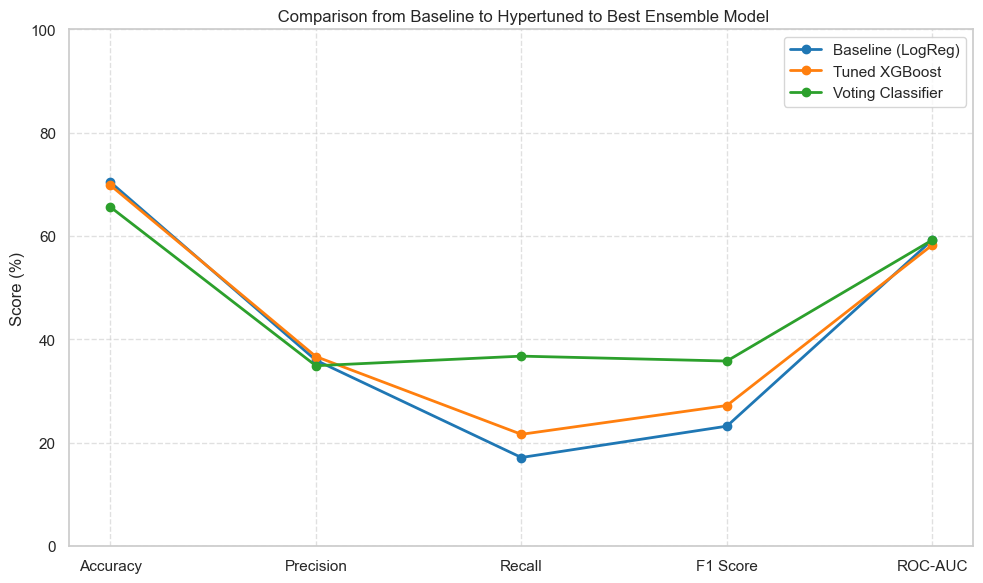

In [307]:
import matplotlib.pyplot as plt
import numpy as np

# Metric labels
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

# Model scores
logreg     = [70.43, 35.94, 17.10, 23.17, 59.24]  # Baseline
tuned_xgb  = [69.82, 36.65, 21.59, 27.17, 58.26]
voting_clf = [65.61, 34.87, 36.73, 35.78, 59.23]

model_scores = np.array([logreg, tuned_xgb, voting_clf])
model_labels = ['Baseline (LogReg)', 'Tuned XGBoost', 'Voting Classifier']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))

for i in range(len(model_scores)):
    plt.plot(x, model_scores[i], marker='o', label=model_labels[i], color=colors[i], linewidth=2)

# Formatting
plt.xticks(x, metrics)
plt.ylabel("Score (%)")
plt.ylim(0, 100)
plt.title(" Comparison from Baseline to Hypertuned to Best Ensemble Model")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### SHAP for model interpretability

In [287]:
voting_model_pipeline.fit(X_train, y_train)


C:\Users\ASUS SMART\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:27:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['QUANT_DEPENDANTS',
                                                   'MONTHS_IN_RESIDENCE',
                                                   'PERSONAL_MONTHLY_INCOME',
                                                   'QUANT_SPECIAL_BANKING_ACCOUNTS',
                                                   'QUANT_CARS', 'AGE', 'SEX',
                                                   'FLAG_RESIDENCIAL_PHONE',
                                                   'COMPANY',
                                                   'FLAG_PROFESSIONAL_PHONE',
                                                   '...
                                                             gamma=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=6,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...))],
                                  voting='soft'))])

In [288]:
# Transform X_test through all steps *except* final classifier
from sklearn.pipeline import Pipeline

# Get X_test transformed till feature selection step
X_test_transformed = voting_model_pipeline.named_steps['feature_select'].transform(
    voting_model_pipeline.named_steps['preprocessor'].transform(X_test)
)


In [289]:
xgb_model = voting_clf.named_estimators_['xgb']


AttributeError: 'list' object has no attribute 'named_estimators_'

In [ ]:
# Create SHAP explainer for XGBoost
explainer = shap.Explainer(xgb_model, X_test_transformed)

# Compute SHAP values
shap_values = explainer(X_test_transformed)

In [ ]:
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar")


In [ ]:
shap.summary_plot(shap_values, X_test_transformed)


In [ ]:
shap.plots.waterfall(shap_values[0])  # Explain the first test instance


### Catboost

In [ ]:
'''from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

# Define CatBoost model
cat_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=0,
    random_state=42,
    class_weights=[1, 1]  # Since you've already used SMOTE
)

# Train
cat_model.fit(X_train_smote, y_train_smote)

# Predict
cat_preds = cat_model.predict(X_test_selected_55)
cat_probs = cat_model.predict_proba(X_test_selected_55)[:, 1]

# Evaluate
print("🚀 CatBoost Results")
print("-" * 40)
print(f"Accuracy       : {accuracy_score(y_test, cat_preds):.4f}")
print(f"Precision      : {precision_score(y_test, cat_preds):.4f}")
print(f"Recall         : {recall_score(y_test, cat_preds):.4f}")
print(f"F1 Score       : {f1_score(y_test, cat_preds):.4f}")
print(f"ROC-AUC Score  : {roc_auc_score(y_test, cat_probs):.4f}\n")

print("Classification Report:\n", classification_report(y_test, cat_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, cat_preds))
'''

## Visualization of performance metrics of various models

C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\2760606345.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS SMART\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


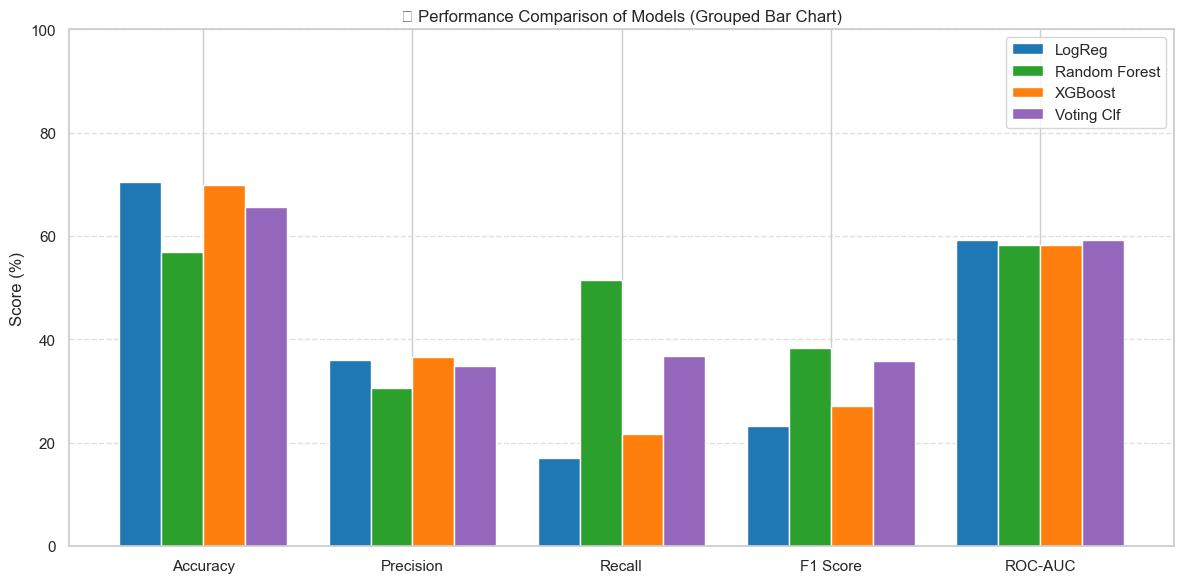

In [258]:
import matplotlib.pyplot as plt
import numpy as np

# Define metric labels and scores
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
models = ['LogReg', 'Random Forest', 'XGBoost', 'Voting Clf']

# Scores (%)
logreg  = [70.43, 35.94, 17.10, 23.17, 59.24]
rf      = [56.85, 30.56, 51.46, 38.35, 58.17]
xgb     = [69.82, 36.65, 21.59, 27.17, 58.26]
voting  = [65.61, 34.87, 36.73, 35.78, 59.23]
model_metrics = [logreg, rf, xgb, voting]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd']

x = np.arange(len(metric_names))
width = 0.2

plt.figure(figsize=(12, 6))
for i, (metrics, model) in enumerate(zip(model_metrics, models)):
    plt.bar(x + (i - 1.5) * width, metrics, width, label=model, color=colors[i])

plt.xticks(x, metric_names)
plt.ylabel("Score (%)")
plt.ylim(0, 100)
plt.title("📊 Performance Comparison of Models (Grouped Bar Chart)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\3965192397.py:23: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\3965192397.py:23: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS SMART\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS SMART\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


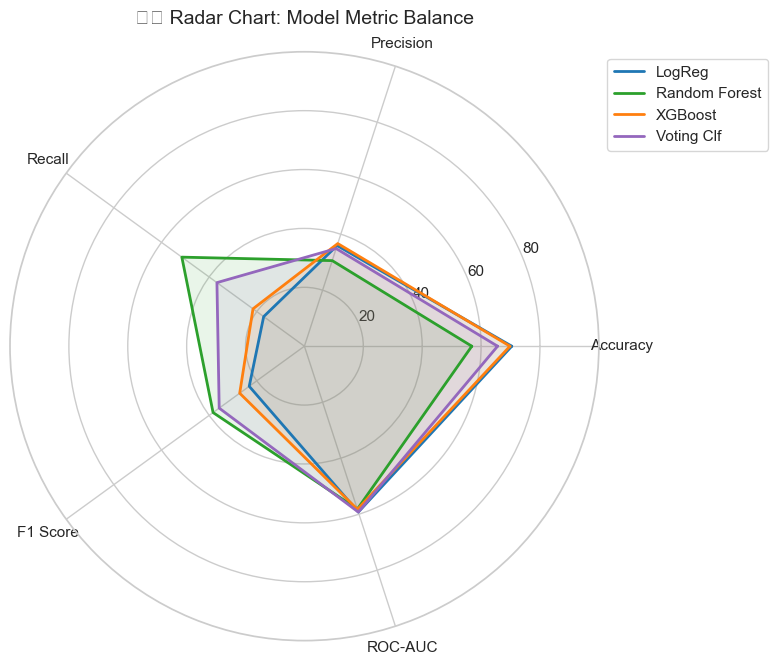

In [260]:
from math import pi

# Radar chart setup
labels = metric_names
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for i, (metrics, model) in enumerate(zip(model_metrics, models)):
    values = metrics + [metrics[0]]
    ax.plot(angles, values, linewidth=2, label=model, color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([20, 40, 60, 80])
ax.set_ylim(0, 100)
ax.set_title("🕸️ Radar Chart: Model Metric Balance", size=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()


C:\Users\ASUS SMART\AppData\Local\Temp\ipykernel_11884\330052740.py:24: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS SMART\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


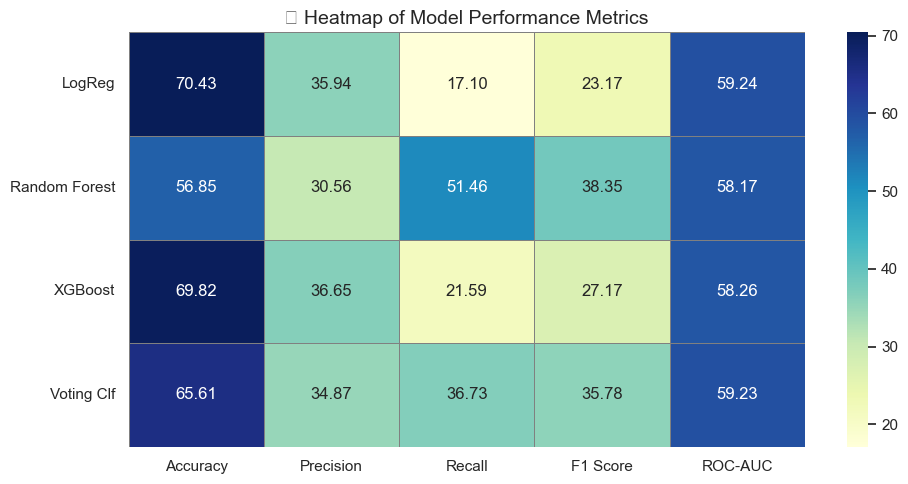

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define data
data = {
    'Accuracy':  [70.43, 56.85, 69.82, 65.61],
    'Precision': [35.94, 30.56, 36.65, 34.87],
    'Recall':    [17.10, 51.46, 21.59, 36.73],
    'F1 Score':  [23.17, 38.35, 27.17, 35.78],
    'ROC-AUC':   [59.24, 58.17, 58.26, 59.23]
}

models = ['LogReg', 'Random Forest', 'XGBoost', 'Voting Clf']

# Create DataFrame
df_metrics = pd.DataFrame(data, index=models)

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_metrics, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("🔍 Heatmap of Model Performance Metrics", fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


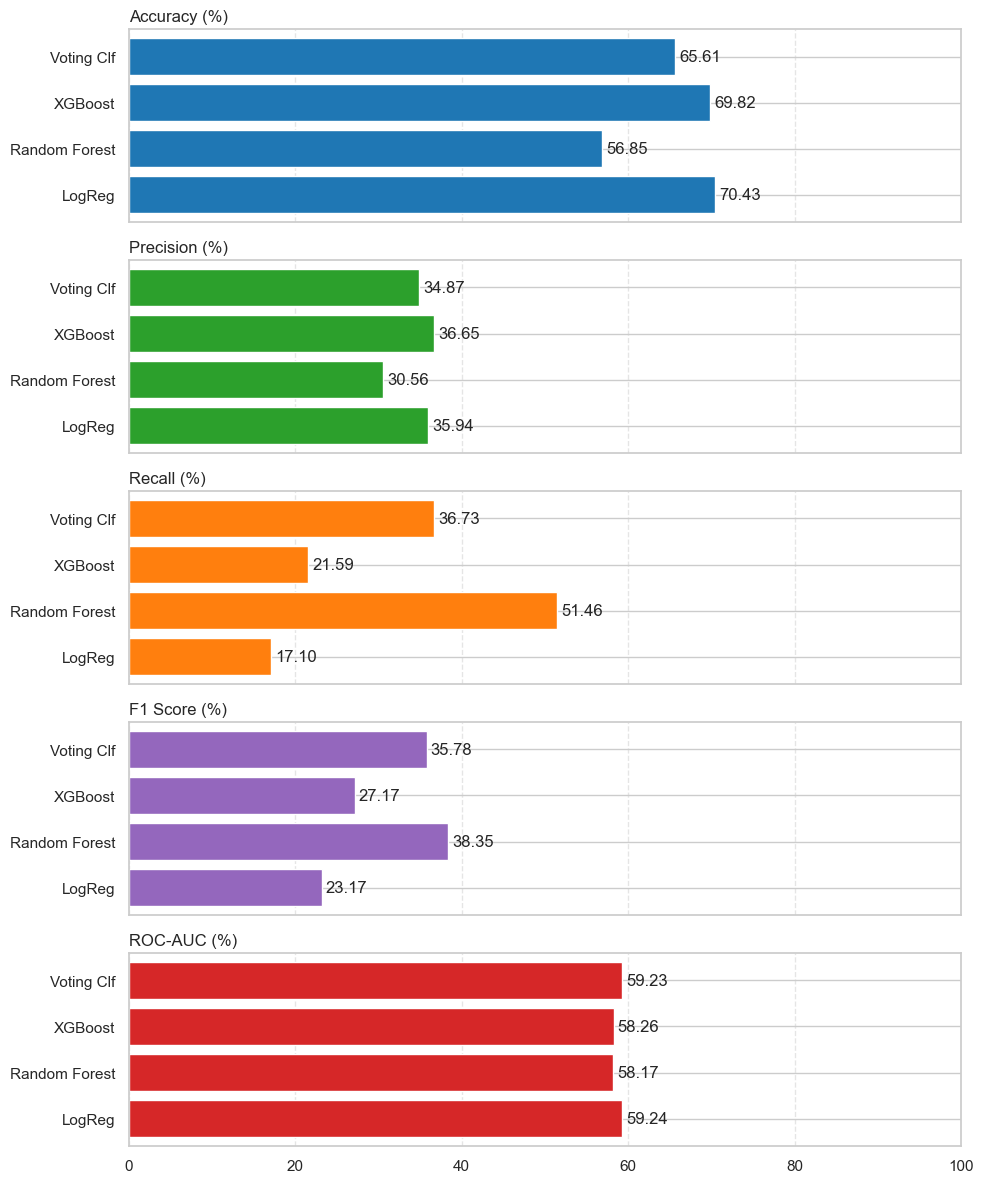

In [266]:
import matplotlib.pyplot as plt

# Models
models = ['LogReg', 'Random Forest', 'XGBoost', 'Voting Clf']

# Metrics (in %)
accuracy  = [70.43, 56.85, 69.82, 65.61]
precision = [35.94, 30.56, 36.65, 34.87]
recall    = [17.10, 51.46, 21.59, 36.73]
f1_score  = [23.17, 38.35, 27.17, 35.78]
roc_auc   = [59.24, 58.17, 58.26, 59.23]

# Data and labels
metric_data = [accuracy, precision, recall, f1_score, roc_auc]
metric_names = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)', 'ROC-AUC (%)']
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']

# Plotting
fig, axs = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

for i, ax in enumerate(axs):
    ax.barh(models, metric_data[i], color=colors[i])
    ax.set_title(metric_names[i], loc='left', fontsize=12)
    for j, value in enumerate(metric_data[i]):
        ax.text(value + 0.5, j, f"{value:.2f}", va='center')
    ax.set_xlim(0, 100)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
